In [24]:
import pandas as pd
import numpy as np

In [25]:
#อ่านไฟล์ข้อมูลจาก car_sales.csv
df = pd.read_csv('car_sales.csv')

In [26]:
#ดูตัวอย่างชุดข้อมูล 5 แถวแรก
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [27]:
#ดูตัวอย่างชุดข้อมูล 5 แถวสุดท้าย
df.tail()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin
23905,C_CND_023906,12/31/2023,Donovan,Male,1225000,Pars Auto Sales,Lexus,ES300,DoubleÂ Overhead Camshaft,Auto,Pale White,27500,38701-8047,Hardtop,7020564,Middletown


In [28]:
#แปลง format วันที่ ให้เป็น ปี-เดือน-วัน
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y", errors="coerce")

In [29]:
#แยกวันที่ จาก fulldate ให้เป็น month, day, year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day
df["year"] = df ["Date"].dt.year

In [30]:
#ลบ column Date
df.drop("Date", axis=1, inplace=True)

In [31]:
df.dtypes

Car_id           object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
month             int32
day               int32
year              int32
dtype: object

In [32]:
df.columns

Index(['Car_id', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name',
       'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price ($)',
       'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region', 'month', 'day',
       'year'],
      dtype='object')

In [33]:
#ทำการ clean ชื่อ column ด้วยการ str.strip()
df.columns = df.columns.str.strip() 
df.columns

Index(['Car_id', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name',
       'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price ($)',
       'Dealer_No', 'Body Style', 'Phone', 'Dealer_Region', 'month', 'day',
       'year'],
      dtype='object')

In [34]:
#ตรวจสอบข้อมูลที่เป็น null ในชุดข้อมูล
df.isnull().sum()

Car_id           0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
month            0
day              0
year             0
dtype: int64

In [35]:
# คำถามที่จะหาจากชุดข้อมูล
# 1. รถยี่ห้อใดขายดีที่สุด 10 อันดับแรก?
# 2. รถรุ่นไหนขายดีที่สุด 10 อันดับแรก?
# 3. รถประเภทใดเป็นที่นิยมมากที่สุด?

In [36]:
# 1. รถยี่ห้อใดขายดีที่สุด 10 อันดับแรก?
brand_most_selling = df.groupby("Company")["Company"].count().reindex().sort_values(ascending=False).head(10)
brand_most_selling

Company
Chevrolet     1819
Dodge         1671
Ford          1614
Volkswagen    1333
Mercedes-B    1285
Mitsubishi    1277
Chrysler      1120
Oldsmobile    1111
Toyota        1110
Nissan         886
Name: Company, dtype: int64

In [37]:
# 2. รถรุ่นไหนขายดีที่สุด 10 อันดับแรก?
model_most_selling = df.groupby(["Model"])["Model"].count().reindex().sort_values(ascending=False).head(10)
model_most_selling

Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Jetta         382
RL            372
LS400         354
LHS           330
A6            329
Name: Model, dtype: int64

In [38]:
# 3. รถประเภทใดเป็นที่นิยมมากที่สุด?
transmission_most_selling = df.groupby("Transmission")["Transmission"].count().reindex().sort_values(ascending=False)
transmission_most_selling

Transmission
Auto      12571
Manual    11335
Name: Transmission, dtype: int64

In [39]:
# 4. รถประเภท auto model ไหนเป็นที่นิยมมากที่สุด?
df_auto = df[df["Transmission"] == "Auto"]
auto_model_most_selling = df_auto.groupby("Model")["Model"].count().reindex().sort_values(ascending=False).head(10)
auto_model_most_selling

Model
Jetta       280
Passat      260
LHS         257
300M        243
Explorer    225
323i        223
Diamante    205
LS400       200
Viper       192
Metro       191
Name: Model, dtype: int64

In [40]:
# 5. รถประเภท Manual  model ไหนเป็นที่นิยมมากที่สุด?
df_manual = df[df["Transmission"] == "Manual"]
manual_model_most_selling = df_manual.groupby("Model")["Model"].count().reindex().sort_values(ascending=False).head(10)
manual_model_most_selling

Model
RL             317
Ram Pickup     269
Silhouette     258
Prizm          257
A6             217
528i           216
Diamante       213
Continental    206
S40            179
Malibu         171
Name: Model, dtype: int64

In [41]:
#แนวโน้มจำนวนการขายรถ ของ Chevrolet  ตามเดือน
df_chevrolet_selling = df[df['Company'] == 'Chevrolet']
chevrolet_selling_by_month = df_chevrolet_selling.groupby("month")["month"].count().sort_index(ascending=True)
chevrolet_selling_by_month


month
1      65
2      63
3     104
4     124
5     155
6     123
7     132
8     135
9     260
10    129
11    268
12    261
Name: month, dtype: int64

In [42]:
#แนวโน้มจำนวนการขายรถ ของ  Dodge   ตามเดือน
df_dodge_selling = df[df['Company'] == 'Dodge']
dodge_selling_by_month = df_dodge_selling.groupby("month")["month"].count().sort_index(ascending=True)
dodge_selling_by_month

month
1      53
2      60
3      94
4     123
5     128
6     113
7     102
8     118
9     256
10    125
11    247
12    252
Name: month, dtype: int64

In [43]:
#แนวโน้มจำนวนการขายรถ ของ Ford  ตามเดือน
df_ford_selling = df[df['Company'] == 'Ford']
ford_selling_by_month = df_ford_selling.groupby("month")["month"].count().sort_index(ascending=True)
ford_selling_by_month

month
1      50
2      46
3     112
4     101
5     107
6     127
7     126
8     115
9     226
10    131
11    230
12    243
Name: month, dtype: int64

In [44]:
#แนวโน้มจำนวนการขายรถ ของ Volkswagen  ตามเดือน
df_volkswagen_selling = df[df['Company'] == 'Volkswagen']
volkswagen_selling_by_month = df_volkswagen_selling.groupby("month")["month"].count().sort_index(ascending=True)
volkswagen_selling_by_month

month
1      38
2      32
3      77
4      98
5     100
6      98
7     104
8      91
9     202
10    106
11    198
12    189
Name: month, dtype: int64

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

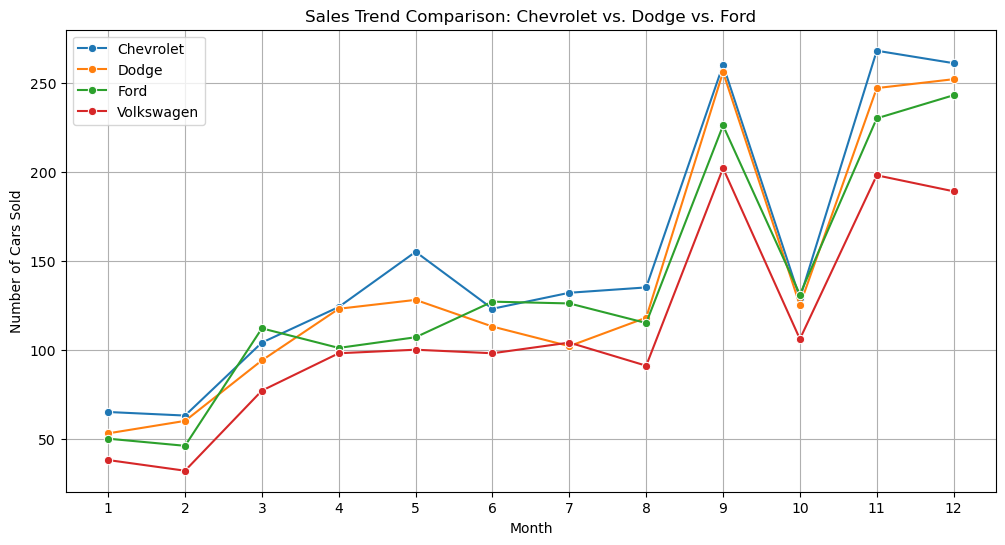

In [46]:
plt.figure(figsize=(12, 6))

# กราฟเส้นสำหรับ Chevrolet
sns.lineplot(x=chevrolet_selling_by_month.index, y=chevrolet_selling_by_month.values, marker='o', label='Chevrolet')

# กราฟเส้นสำหรับ Dodge
sns.lineplot(x=dodge_selling_by_month.index, y=dodge_selling_by_month.values, marker='o', label='Dodge')

# กราฟเส้นสำหรับ Ford
sns.lineplot(x=ford_selling_by_month.index, y=ford_selling_by_month.values, marker='o', label='Ford')

# กราฟเส้นสำหรับ Volkswagen
sns.lineplot(x=volkswagen_selling_by_month.index, y=volkswagen_selling_by_month.values, marker='o', label='Volkswagen')


plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.title('Sales Trend Comparison: Chevrolet vs. Dodge vs. Ford')
plt.xticks(range(1, 13))  # กำหนดให้แกน x แสดงเดือน 1-12
plt.grid(True)
plt.legend()
plt.show()